# Plotting in Julia

In this lesson we will learn how to make beautiful plots using the [Plots.jl package](https://github.com/JuliaPlots/Plots.jl)

n Julia there are many different libraries for plotting, for example `PyPlot.jl`, `GR.jl` and `Plotly.jl`. `Plots.jl` is a wrapper around all those library and exposes a clean and simple API for plotting. You can find all the back-ends available for Plots.jl [here](https://docs.juliaplots.org/latest/backends/).

## Contents
- [Using Plots.jl](#Using-Plots.jl)
- [Working with different backends](#Working-with-different-backends)


## Using Plots.jl

Let’s make our first plot! We need to compute `x` and `y = f(x)`, for example let’s plot the sine function using the `gr` backend:


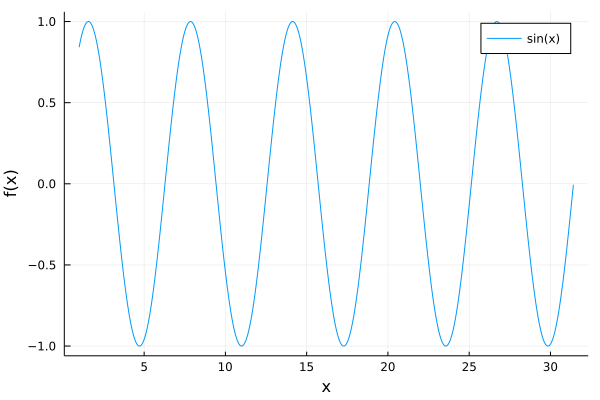

In [11]:
using Plots
gr()

function plotsFun()
    x = 1:0.01:10*π
    y = sin.(x)
    plot(x, y, label="sin(x)")
    plot!(xlab="x", ylab="f(x)")
end

plotsFun()

We add some elements to the plot, using `plot!`. Remember that in Julia the `!` is appended to the name of functions which perform some modification: in this case `plot!` modifies the current plot. In particular, we add a label to the x-axis and the y-axis.

Let’s add another curve to the plot:

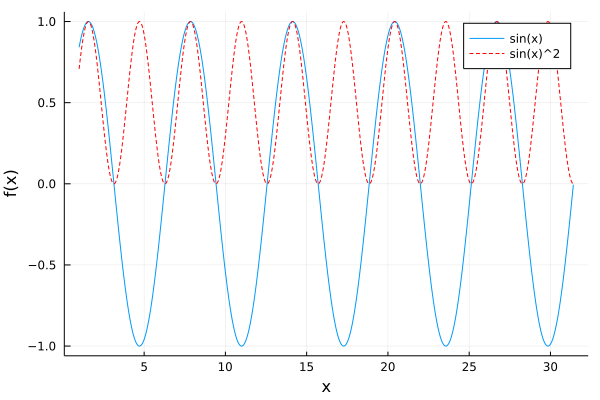

In [13]:
function plotsFun()
    x = 1:0.01:10*π
    y = sin.(x)
    plot(x, y, label="sin(x)")
    plot!(xlab="x", ylab="f(x)")
    
    y2=sin.(x).^2
    plot!(x, y2, label="sin(x)^2", color=:red, line=:dash)

end

plotsFun()

you can see that we have specified the colour of the line and the linestyle (which is dashed in this case). You can find more information on the possible parameters at the [official documentation](http://docs.juliaplots.org/latest/attributes/).

Now we can set the scale of the x-axis to be logarithmic and change the position of the legend. We can see how it is possible to save the current plot as a .png file if we like:

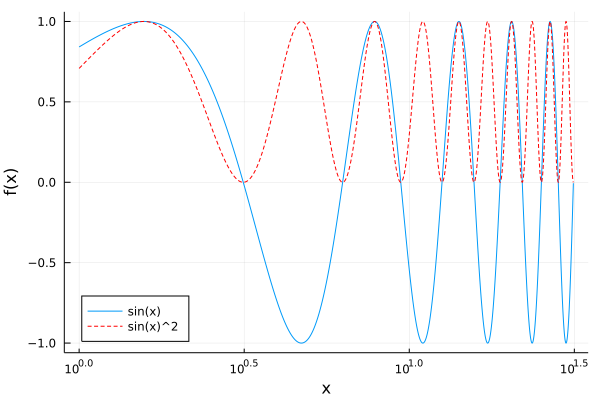

In [15]:
function plotsFun()
    x = 1:0.01:10*π
    y = sin.(x)
    plot(x, y, label="sin(x)")
    plot!(xlab="x", ylab="f(x)")
    
    y2=sin.(x).^2
    plot!(x, y2, label="sin(x)^2", color=:red, line=:dash)
    xaxis!(:log10)
    plot!(legend=:bottomleft)

    #savefig("img1c.png")
end

plotsFun()

## Working with different backends

Different backends have different features. Up to now we have worked with GR, which is fast and has almost everything you may need. Since GR is a relatively new backend, you may need to look at other backends for more customisation options. In this section, we will deal with Plotly and PyPlot.

### Plotly

[Plotly](https://plotly.com/julia/) is a good solution if you want to have nice interactive plots.

To make a plot with Plotly, select the `plotly()` back-end and create a plot:

In [34]:
# set new backend
plotly()

function PlotlyFun()
    x=1:0.1:3*π
    y=1:0.1:3*π

    xx = reshape([xi for xi in x for yj in y],  length(y), length(x))
    yy = reshape([yj for xi in x for yj in y],  length(y), length(x))
    zz = sin.(xx).*cos.(yy)
    
    plot3d(xx,yy,zz, label=:none, st = :surface)
    plot!(xlab="x", ylab="y", zlab="sin(x)*cos(y)")
    #savefig("img2") 
end

PlotlyFun()

Interact with [html image](../images/img2.html).

### PyPlot

PyPlot is a Python library for plotting, it's a wrapper to the module in Matplotlib. It has many customisation capabilities with the downside that you need to first install python and configure Julia to interact with Python. In order to configure and install PyCall, the package required to interact with Python, please refer to [this guide](https://techytok.com/lesson-interacting-with-python/).

This is just an example, I didn't configure this IJulia kernel to work with Python.
With the PyPlot back-end it is possible to use LaTeX in the labels (and axis labels) adding the LaTeXStrings package:

```
using Pkg
Pkg.add("PyPlot")
Pkg.add("LaTeXStrings")


using LaTeXStrings
pyplot()

function PyPlotFun()
    x=0:0.1:2*π
    y=sin.(x).^2

    # You can use LaTeX strings
    plot(x, y, label=L"$\sin(x)^2$")
end

PyPlotFun()
```

## Conclusions
We have learned how to make some nice plots using three different backends, each one has its pros and cons. 
The Plots package serves as a unified interface.
To summarise:

- Use GR for fast “default” plotting.

- Use Plotly for interactive plotting.

- Use PyPlot if you need some of its customisation options.

For a more comprehensive guide refer to the official documentation:
https://docs.juliaplots.org/latest/tutorial/